<a href="https://colab.research.google.com/github/robertoricci/Curso-Data-Science-com-Python---Banco-MODAL/blob/main/Data_Science_com_Python_M%C3%B3dulo_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Modulo 03 - Manipulação de Dados com Python

O Objetivo deste Modulo e dar inicio ao processo de transformação e processamento de dados, para deixar no formato que precisamos antes de realizar a análise.

#1. Bibliotecas

In [2]:
#Bibliotecas
!pip install datetime
!pip install matplotlib plotly
!pip install yfinance quandl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.graph_objects as go
#financeiros
import yfinance as yf
import quandl as ql



#2. Criar e organizar um dataframe

## 2.1. Dataframe simples, uma coluna

Api da Quandl (Nasdaq) vamos extrair dados da Selic

In [4]:
#api da quandl
ql.ApiConfig.api_key = "r-GnR-zeg2uWjtf9xWxh"
#os códigos referentes a cada papel / Moeda / Taxa de Juros podem ser obtidos na busca no SIte da Quandl
#neste caso, a selic é representada por BCB/432
selic = ql.get("BCB/432",start_date ='2000-01-01', end_date = '2022-12-31')


In [5]:
selic

,Value
Date,
2000-01-01,19.00
2000-01-02,19.00
2000-01-03,19.00
2000-01-04,19.00
2000-01-05,19.00
...,...
2022-05-19,12.75
2022-05-20,12.75
2022-05-21,12.75


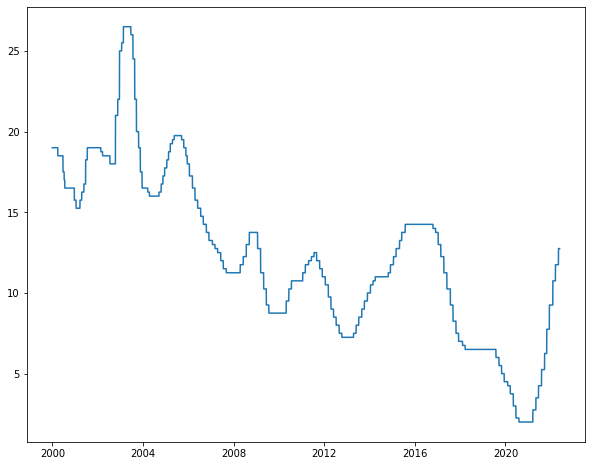

In [7]:
plt.figure(figsize = (10,8))
plt.plot(selic)
plt.show()

In [8]:
selic.head()

,Value
Date,
2000-01-01,19.0
2000-01-02,19.0
2000-01-03,19.0
2000-01-04,19.0
2000-01-05,19.0


##2.2 Filtros Simples

Método .loc para fazer filtros
Filtrando a Selic em dia 

In [10]:
selic_filtrada = selic.loc['2021-05-26']
selic_filtrada

Value    3.5
Name: 2021-05-26 00:00:00, dtype: float64

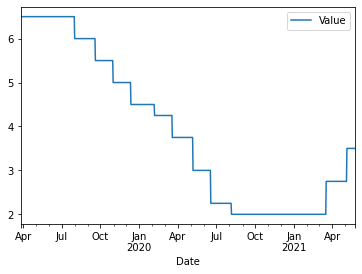

In [13]:
#Para obter os dados entre duas datas
selic_filtrada = selic.loc['2019-03-26':'2021-05-26']
selic_filtrada.plot()

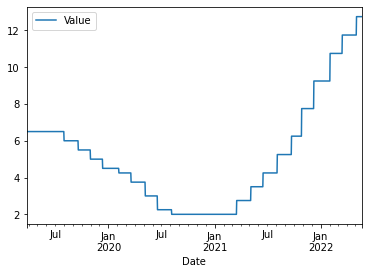

In [14]:
#Filtrando a partir de uma data especifica a indo até o ultimo dia Disponivel
selic_filtrada = selic.loc['2019-03-26':]
selic_filtrada.plot()

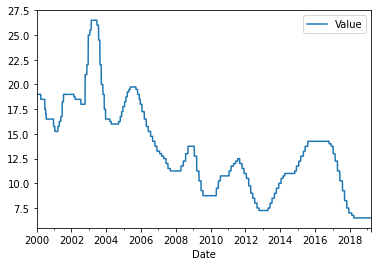

In [15]:
#Filtrando a partir do indo até a uma data especifica
selic_filtrada = selic.loc[:'2019-03-26']
selic_filtrada.plot()

O Método .*iloc*
O .iloc é utilizado quando o filtro deve ser feito com a posição da linha dentro do nosso dataframe
Por exemplo, caso precise da linha 0 ou linha 1. Ou mesmo se precisar de 200 até a linha 500.
Exemplos:


In [17]:
#Obtendo a linha 0 (primeiro linha,excluindo o cabeçalho)
selic_filtrada = selic.iloc[0]
selic_filtrada

Value    19.0
Name: 2000-01-01 00:00:00, dtype: float64

In [19]:
#Obtendo a linha 1 (indexação no python começa em 0)
selic_filtrada = selic.iloc[1]
selic_filtrada

Value    19.0
Name: 2000-01-02 00:00:00, dtype: float64

In [20]:
#Obtendo a linha 200 (indexação no python começa em 0)
selic_filtrada = selic.iloc[200]
selic_filtrada

Value    17.0
Name: 2000-07-19 00:00:00, dtype: float64

In [21]:
#Obtendo ultima linha 
selic_filtrada = selic.iloc[-1]
selic_filtrada

Value    12.75
Name: 2022-05-23 00:00:00, dtype: float64

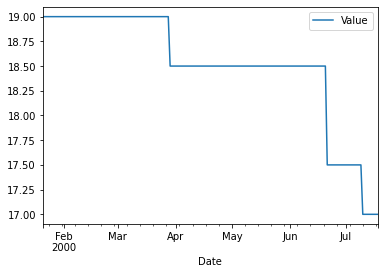

In [23]:
#Obtendo a linha 20 a 200 (indexação no python começa em 0)
selic_filtrada = selic.iloc[20:200]
selic_filtrada.plot()

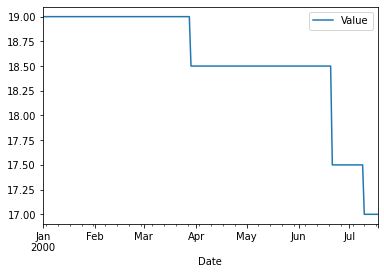

In [24]:
#Obtendo ate a linha 200 
selic_filtrada = selic.iloc[:200]
selic_filtrada.plot()

#2.3 Noções importantes de dataframes

Para demonstrar manipulações de dados em um dataframe de várias colunas, vamos extrair os dados das ações que compõem o IBOV

Para saber a composição atualizada do IBOV, acesse o link:
https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-ibovespa-ibovespa-composicao-da-carteira.htm

Os ativos que compõem o IBOV são os seguintes:


['WEGE3', 'EMBR3', 'AZUL4', 'CCRO3', 'ECOR3', 'GOLL4', 'RAIL3', 'POSI3', 'BRFS3', 'JBSS3', 'MRFG3', 'BEEF3', 'ABEV3', 'ASAI3', 'CRFB3', 'PCAR3', 'NTCO3', 'AMER3', 'SOMA3', 'LREN3', 'MGLU3', 'PETZ3', 'VIIA3', 'ALPA4', 'CYRE3', 'EZTC3', 'JHSF3', 'MRVE3', 'CVCB3', 'COGN3', 'RENT3', 'LCAM3', 'YDUQ3', 'BRML3', 'IGTI11', 'MULT3', 'BIDI11', 'BPAN4', 'BBDC3', 'BBDC4', 'BBAS3', 'BPAC11', 'ITSA4', 'ITUB4', 'SANB11', 'BBSE3', 'IRBR3', 'SULA11', 'B3SA3', 'CIEL3', 'DXCO3', 'KLBN11', 'SUZB3', 'BRAP4', 'CMIN3', 'VALE3', 'BRKM5', 'GGBR4', 'GOAU4', 'CSNA3', 'USIM5', 'RRRP3', 'CSAN3', 'PETR3', 'PETR4', 'PRIO3', 'UGPA3', 'VBBR3', 'HYPE3', 'RADL3', 'FLRY3', 'HAPV3', 'GNDI3', 'QUAL3', 'RDOR3', 'LWSA3', 'CASH3', 'TOTS3', 'VIVT3', 'TIMS3', 'SBSP3', 'CMIG4', 'CPLE6', 'CPFE3', 'ELET3', 'ELET6', 'ENBR3', 'ENGI11', 'ENEV3', 'EGIE3', 'EQTL3', 'TAEE11']

In [30]:
tickers_IBOV = ['WEGE3', 'EMBR3', 'AZUL4', 'CCRO3', 'ECOR3', 'GOLL4', 'RAIL3', 'POSI3', 'BRFS3', 'JBSS3', 'MRFG3', 'BEEF3', 'ABEV3', 'ASAI3', 'CRFB3', 'PCAR3', 'NTCO3', 'AMER3', 'SOMA3', 'LREN3', 'MGLU3', 'PETZ3', 'VIIA3', 'ALPA4', 'CYRE3', 'EZTC3', 'JHSF3', 'MRVE3', 'CVCB3', 'COGN3', 'RENT3', 'LCAM3', 'YDUQ3', 'BRML3', 'IGTI11', 'MULT3', 'BIDI11', 'BPAN4', 'BBDC3', 'BBDC4', 'BBAS3', 'BPAC11', 'ITSA4', 'ITUB4', 'SANB11', 'BBSE3', 'IRBR3', 'SULA11', 'B3SA3', 'CIEL3', 'DXCO3', 'KLBN11', 'SUZB3', 'BRAP4', 'CMIN3', 'VALE3', 'BRKM5', 'GGBR4', 'GOAU4', 'CSNA3', 'USIM5', 'RRRP3', 'CSAN3', 'PETR3', 'PETR4', 'PRIO3', 'UGPA3', 'VBBR3', 'HYPE3', 'RADL3', 'FLRY3', 'HAPV3', 'GNDI3', 'QUAL3', 'RDOR3', 'LWSA3', 'CASH3', 'TOTS3', 'VIVT3', 'TIMS3', 'SBSP3', 'CMIG4', 'CPLE6', 'CPFE3', 'ELET3', 'ELET6', 'ENBR3', 'ENGI11', 'ENEV3', 'EGIE3', 'EQTL3', 'TAEE11']

In [31]:
tickers_IBOV

['WEGE3',
 'EMBR3',
 'AZUL4',
 'CCRO3',
 'ECOR3',
 'GOLL4',
 'RAIL3',
 'POSI3',
 'BRFS3',
 'JBSS3',
 'MRFG3',
 'BEEF3',
 'ABEV3',
 'ASAI3',
 'CRFB3',
 'PCAR3',
 'NTCO3',
 'AMER3',
 'SOMA3',
 'LREN3',
 'MGLU3',
 'PETZ3',
 'VIIA3',
 'ALPA4',
 'CYRE3',
 'EZTC3',
 'JHSF3',
 'MRVE3',
 'CVCB3',
 'COGN3',
 'RENT3',
 'LCAM3',
 'YDUQ3',
 'BRML3',
 'IGTI11',
 'MULT3',
 'BIDI11',
 'BPAN4',
 'BBDC3',
 'BBDC4',
 'BBAS3',
 'BPAC11',
 'ITSA4',
 'ITUB4',
 'SANB11',
 'BBSE3',
 'IRBR3',
 'SULA11',
 'B3SA3',
 'CIEL3',
 'DXCO3',
 'KLBN11',
 'SUZB3',
 'BRAP4',
 'CMIN3',
 'VALE3',
 'BRKM5',
 'GGBR4',
 'GOAU4',
 'CSNA3',
 'USIM5',
 'RRRP3',
 'CSAN3',
 'PETR3',
 'PETR4',
 'PRIO3',
 'UGPA3',
 'VBBR3',
 'HYPE3',
 'RADL3',
 'FLRY3',
 'HAPV3',
 'GNDI3',
 'QUAL3',
 'RDOR3',
 'LWSA3',
 'CASH3',
 'TOTS3',
 'VIVT3',
 'TIMS3',
 'SBSP3',
 'CMIG4',
 'CPLE6',
 'CPFE3',
 'ELET3',
 'ELET6',
 'ENBR3',
 'ENGI11',
 'ENEV3',
 'EGIE3',
 'EQTL3',
 'TAEE11']

In [33]:
tickers_IBOV.sort()
tickers_IBOV

['ABEV3',
 'ALPA4',
 'AMER3',
 'ASAI3',
 'AZUL4',
 'B3SA3',
 'BBAS3',
 'BBDC3',
 'BBDC4',
 'BBSE3',
 'BEEF3',
 'BIDI11',
 'BPAC11',
 'BPAN4',
 'BRAP4',
 'BRFS3',
 'BRKM5',
 'BRML3',
 'CASH3',
 'CCRO3',
 'CIEL3',
 'CMIG4',
 'CMIN3',
 'COGN3',
 'CPFE3',
 'CPLE6',
 'CRFB3',
 'CSAN3',
 'CSNA3',
 'CVCB3',
 'CYRE3',
 'DXCO3',
 'ECOR3',
 'EGIE3',
 'ELET3',
 'ELET6',
 'EMBR3',
 'ENBR3',
 'ENEV3',
 'ENGI11',
 'EQTL3',
 'EZTC3',
 'FLRY3',
 'GGBR4',
 'GNDI3',
 'GOAU4',
 'GOLL4',
 'HAPV3',
 'HYPE3',
 'IGTI11',
 'IRBR3',
 'ITSA4',
 'ITUB4',
 'JBSS3',
 'JHSF3',
 'KLBN11',
 'LCAM3',
 'LREN3',
 'LWSA3',
 'MGLU3',
 'MRFG3',
 'MRVE3',
 'MULT3',
 'NTCO3',
 'PCAR3',
 'PETR3',
 'PETR4',
 'PETZ3',
 'POSI3',
 'PRIO3',
 'QUAL3',
 'RADL3',
 'RAIL3',
 'RDOR3',
 'RENT3',
 'RRRP3',
 'SANB11',
 'SBSP3',
 'SOMA3',
 'SULA11',
 'SUZB3',
 'TAEE11',
 'TIMS3',
 'TOTS3',
 'UGPA3',
 'USIM5',
 'VALE3',
 'VBBR3',
 'VIIA3',
 'VIVT3',
 'WEGE3',
 'YDUQ3']

**PONTO IMPORTANTE**

As ações brasileiras no Yahoo Finance terminam com ".SA". Isso é válido inclusive para outros papéis, como ETFs, FIIs, BDRs

Montar estrutura para alterar a lista de ticker com .SA

In [38]:
tickers_IBOV_SA = []

for i in tickers_IBOV:
  tickers_IBOV_SA.append(i+'.SA')

In [39]:
tickers_IBOV_SA

['ABEV3.SA',
 'ALPA4.SA',
 'AMER3.SA',
 'ASAI3.SA',
 'AZUL4.SA',
 'B3SA3.SA',
 'BBAS3.SA',
 'BBDC3.SA',
 'BBDC4.SA',
 'BBSE3.SA',
 'BEEF3.SA',
 'BIDI11.SA',
 'BPAC11.SA',
 'BPAN4.SA',
 'BRAP4.SA',
 'BRFS3.SA',
 'BRKM5.SA',
 'BRML3.SA',
 'CASH3.SA',
 'CCRO3.SA',
 'CIEL3.SA',
 'CMIG4.SA',
 'CMIN3.SA',
 'COGN3.SA',
 'CPFE3.SA',
 'CPLE6.SA',
 'CRFB3.SA',
 'CSAN3.SA',
 'CSNA3.SA',
 'CVCB3.SA',
 'CYRE3.SA',
 'DXCO3.SA',
 'ECOR3.SA',
 'EGIE3.SA',
 'ELET3.SA',
 'ELET6.SA',
 'EMBR3.SA',
 'ENBR3.SA',
 'ENEV3.SA',
 'ENGI11.SA',
 'EQTL3.SA',
 'EZTC3.SA',
 'FLRY3.SA',
 'GGBR4.SA',
 'GNDI3.SA',
 'GOAU4.SA',
 'GOLL4.SA',
 'HAPV3.SA',
 'HYPE3.SA',
 'IGTI11.SA',
 'IRBR3.SA',
 'ITSA4.SA',
 'ITUB4.SA',
 'JBSS3.SA',
 'JHSF3.SA',
 'KLBN11.SA',
 'LCAM3.SA',
 'LREN3.SA',
 'LWSA3.SA',
 'MGLU3.SA',
 'MRFG3.SA',
 'MRVE3.SA',
 'MULT3.SA',
 'NTCO3.SA',
 'PCAR3.SA',
 'PETR3.SA',
 'PETR4.SA',
 'PETZ3.SA',
 'POSI3.SA',
 'PRIO3.SA',
 'QUAL3.SA',
 'RADL3.SA',
 'RAIL3.SA',
 'RDOR3.SA',
 'RENT3.SA',
 'RRRP3.SA',
 'SANB1

Uma vez que temos uma lista com o nome dos tickers corrigidos para fazer a busca na yfinance (que extrai os dados da Yahoo Finance)

In [41]:
yf.download('PETR4.SA',start='2022-02-01',end = '2022-02-18', period="1d")

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-01,32.349998,33.320000,31.950001,33.000000,30.164644,57315200
2022-02-02,33.410000,33.490002,32.360001,32.520000,29.725887,36271700
2022-02-03,32.349998,32.919998,31.620001,32.070000,29.314550,51087800
2022-02-04,32.410000,33.230000,31.879999,32.630001,29.826435,59346800
2022-02-07,32.549999,32.779999,32.130001,32.150002,29.387678,48868100
2022-02-08,31.900000,31.950001,31.260000,31.830000,29.095171,62590000
2022-02-09,31.740000,32.689999,31.650000,31.950001,29.204861,50960500
2022-02-10,32.299999,32.900002,31.940001,32.439999,29.652758,49534600
2022-02-11,32.770000,33.910000,32.630001,33.759998,30.859344,88013400


Pegando dados da lista de ativos

In [43]:
yf.download(tickers_IBOV_SA,start='2022-02-01',end = '2022-02-18', period="1d")

KeyboardInterrupt: ignored